In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [73]:
# gear one parameters # experimental/default
# this will be the larger gear with 20 teeth
# this cell is contains the imput parameters for gear one. The objective is to use this information to calutate all the parameters of the cell(s) below

u = np.linspace(0,2*np.pi,200)
z1 = 20 # number of teeth 
ref_dia1 = 20 # reference diameter
ref_radius1 = ref_dia1 / 2 # reference radius
base_dia1 = 18.7939
base_radius_1 = base_dia1 / 2
z1_thickness = 10.7079 # tooth thickness at base
pitch1 = (np.pi*ref_dia1) / z1 # pitch
module1 = ref_dia1 / z1 # module
print(module1)

1.0


In [74]:
# expected results from cell above (20 teeth)
# these are the pre-determined parameters to test the 'calculated' parameters agains
u1_min = 0
u1_max = .6085
u1_step = 10
u1 = np.linspace(u1_min,u1_max,u1_step)
x1 = 9.3969 * (np.cos(u1) + u1 * np.sin(u1))
y1 = 9.3969 * (np.sin(u1) - u1 * np.cos(u1))


#####  Test Metrics unit 2

In [75]:
# this cell compares metrics from obove cell with same mitrics using 30 teeth
z1_2 = 30 # number of teeth 
ref_dia1_2 = 30 # reference diameter
ref_radius1_2 = ref_dia1 / 2 # reference radius
base_dia1_2 = 28.1908
base_radius_2 = base_dia1_2 / 2
tip_diameter_2 = 32
z1_2_thickness = 7.7079
pitch1_2 = (np.pi*ref_dia1_2) / z1_2 # pitch
module1_2 = ref_dia1_2 / z1_2 # module
print(module1_2)

1.0


In [76]:
# expected results from above cell
u1_min2 = 0
u1_max2 = .5371
u1_step2 = 10
u1_2 = np.linspace(u1_min2,u1_max2,u1_step2)
x1_2 = 14.0954 * (np.cos(u1_2) + u1_2 * np.sin(u1_2))
y1_2 = 14.0954 * (np.sin(u1_2) - u1_2 * np.cos(u1_2))

##### TestMetrics Unit 3

In [77]:
# this cell compares metrics from obove cell with same mitrics using 40 teeth
z1_3 = 40 # number of teeth 
ref_dia1_3 = 40 # reference diameter
ref_radius1_3 = ref_dia1 / 2 # reference radius
base_dia1_3 = 37.5877
base_radius_3 = base_dia1_3 / 2
tip_diameter_3 = 42
z1_3_thickness = 6.2079
pitch1_3 = (np.pi*ref_dia1_3) / z1_2 # pitch
module1_3 = ref_dia1_3 / z1_3 # module
print(module1_3)

1.0


In [86]:
# expected results from above cell
u1_min3 = 0
u1_max3 = 0.4986
u1_step3 = 10
u1_3 = np.linspace(u1_min3,u1_max3,u1_step3)
x1_3 = 18.7939 * (np.cos(u1_3) + u1_3 * np.sin(u1_3))
y1_3 = 18.7939 * (np.sin(u1_3) - u1_3 * np.cos(u1_3))

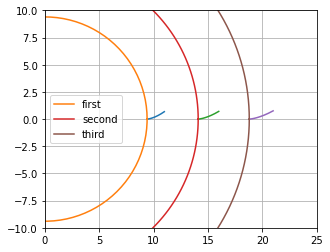

In [88]:
# plotting

# unit one
plt.plot(x1,y1)
plt.plot(base_radius_1*np.cos(u),base_radius_1*np.sin(u), label='first')

# unit two
plt.plot(x1_2,y1_2)
plt.plot(base_radius_2*np.cos(u),base_radius_2*np.sin(u), label='second')

# unit three
plt.plot(x1_3,y1_3)
plt.plot(base_radius_3*np.cos(u),base_radius_3*np.sin(u), label='third')

squares = 50
plt.legend()
plt.axis('square')
plt.grid()
# plt.axis([-squares,squares,-squares,squares])
plt.axis([0,25,-10,10])
plt.show()

In [ ]:
# gear one calulation

In [32]:
# gear two parameters # experimental/default
z2 = 10 # number of teeth
ref_dia2 = 10 # reference diameter
pitch2 = (np.pi*ref_dia2) / z2 # pitch
module2 = ref_dia2 / z2 # module
print(module2)

1.0


In [15]:
print(module2)

0.6
